In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
reddit = pd.read_csv("Reddit_Combi.csv", sep=';')
reddit.drop(['Unnamed: 4'], axis=1, inplace=True)
reddit.head()

,title,body,Body_Title,label
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again,"After my closest friend left me in April, I ha...",I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",Is it possible to recover from such a traumati...,1


In [4]:
print(reddit.shape)
reddit.isnull().sum()

(3123, 4)


title          0
body          10
Body_Title     0
label          0
dtype: int64

In [5]:
twitter = pd.read_csv("Twitter_ Non-Advert-Tabelle 1.csv", sep=';')
twitter.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
twitter.head()

,text,label
0,speak-no-evil monkey Can I Be Honest With You...,1
1,Frau Goebbels early signs of psychosis psychot...,1
2,A lot of work and unfulfilled tasks plunge you...,1
3,Private health insurance delivers value for yo...,1
4,XpertOnline offers you the convenience of view...,1


In [6]:
print(twitter.shape)
twitter.isnull().sum()

(2051, 2)


text     0
label    0
dtype: int64

In [7]:
dataset = pd.DataFrame({
    'text': np.append(reddit['Body_Title'], twitter['text']),
    'label': np.append(reddit['label'], twitter['label'])
})
dataset.head()

,text,label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


In [8]:
print(dataset.shape)
dataset.isnull().sum()

(5174, 2)


text     0
label    0
dtype: int64

In [9]:
dataset.duplicated().sum()

79

In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
dataset.duplicated().sum()

0

In [12]:
dataset.to_csv("final_dataset.csv", index=False)

In [13]:
df = pd.read_csv("final_dataset.csv")

In [14]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5095 non-null   object
 1   label   5095 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 79.7+ KB


<Axes: xlabel='label', ylabel='count'>

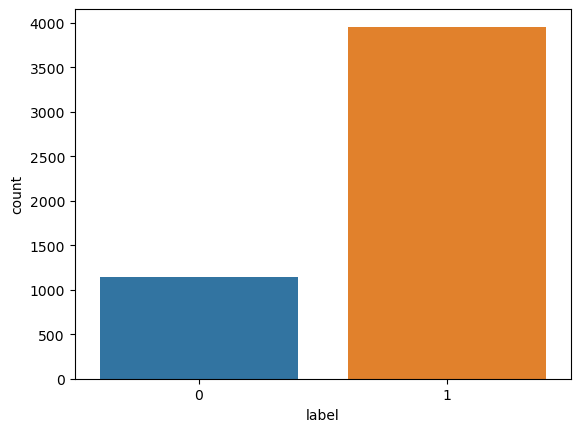

In [16]:
sns.countplot(df, x="label")

In [17]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [18]:
def text_preprocessing(text):
    # lowercase all characters
    text = text.lower()
    
    # tokenization
    text = nltk.word_tokenize(text)
    
    # remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # remove stopwords
    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)
            
    text = y[:]
    y.clear()
    
    # stemming
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [19]:
df["transformed_text"] = df["text"].apply(text_preprocessing)
df.head()

,text,label,transformed_text
0,Envy to other is swallowing me Im from develop...,1,envi swallow im developingcountri indonesia te...
1,Nothin outta the ordinary. Paradise. Job stres...,1,nothin outta ordinari paradis job stress life ...
2,Almost 49 and the chasm of emptiness has never...,1,almost 49 chasm empti never greater diagnos se...
3,I’m happy again After my closest friend left m...,0,happi closest friend left april final let go r...
4,Is it possible to recover from such a traumati...,1,possibl recov traumat childhood 15 yet feel li...


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [23]:
X = tfidf.fit_transform(df['transformed_text'])
y = df['label'].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 2)

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59       328
           1       0.87      0.98      0.92      1201

    accuracy                           0.86      1529
   macro avg       0.86      0.71      0.75      1529
weighted avg       0.86      0.86      0.85      1529



<Axes: >

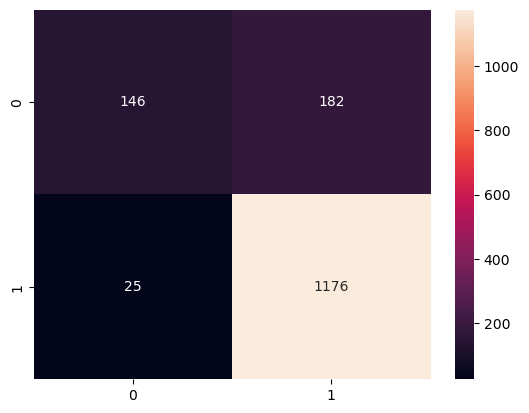

In [35]:
cm = confusion_matrix(y_test, prediction)
sns.heatmap(cm, annot=True, fmt='d')

In [75]:
import pickle
pickle.dump(svc,open('svcmodel.pkl','wb'))
pickle.dump(tfidf,open('vectorizer.pkl','wb'))